In [1]:
from langgraph.graph import StateGraph ,START ,END
from typing_extensions import TypedDict
from langchain_ollama import OllamaLLM

In [15]:
class SubState(TypedDict):

    input_text: str
    translated_text: str


In [16]:
from langchain_community.chat_models import ChatOllama

sub_llm = ChatOllama(
    model="phi3:mini",
    temperature=0
)
    

In [29]:
def translate_text(state: SubState):

    prompt = f"""
Translate the following text to Hindi.
Keep it natural and clear. Do not add extra content.

Text:
{state["input_text"]}
""".strip()
    
    translated_text = sub_llm.invoke(prompt).content

    return {'translated_text': translated_text}


In [30]:
subgraph_builder = StateGraph(SubState)

subgraph_builder.add_node('translate_text', translate_text)

subgraph_builder.add_edge(START, 'translate_text')
subgraph_builder.add_edge('translate_text', END)

subgraph = subgraph_builder.compile()

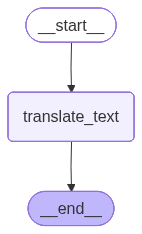

In [31]:
subgraph

In [2]:
class ParentState(TypedDict):

    question: str
    answer_eng: str
    answer_hin: str
    

NameError: name 'TypedDict' is not defined

In [33]:
parent_llm=ChatOllama(
    model="phi3:mini",
    temperature=0
)
    

In [1]:
def generate_answer(state: ParentState):

    answer = parent_llm.invoke(f"You are a helpful assistant. Answer clearly.\n\nQuestion: {state['question']}").content
    return {'answer_eng': answer}

NameError: name 'ParentState' is not defined

In [24]:
def translate_answer(state: ParentState):

    # call the subgraph
    result = subgraph.invoke({'input_text': state['answer_eng']})

    return {'answer_hin': result['translated_text']}

In [ ]:
parent_builder = StateGraph(ParentState)

In [25]:
parent_builder.add_node("answer", generate_answer)
parent_builder.add_node("translate", translate_answer)

parent_builder.add_edge(START, 'answer')
parent_builder.add_edge('answer', 'translate')
parent_builder.add_edge('translate', END)

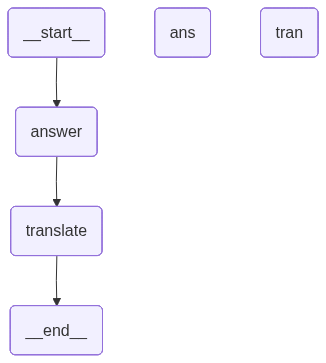

In [27]:
graph=parent_builder.compile()
graph

In [28]:
graph.invoke({'question': 'What is quantum physics'})

{'question': 'What is quantum physics',
 'answer_eng': 'Quantum physics, also known as quantum mechanics, is the branch of physics that studies phenomena at very small scales such as molecules, atoms and subatomic particles like electrons and photons (light). It differs from classical physics in fundamental ways. For instance, it introduces concepts like wave-particle duality where light can behave both as a particle and a wave; superposition principle which states that quantum entities exist in all possible states simultaneously until observed or measured; entanglement phenomenon where particles become interconnected such that the state of one instantly affects the other regardless of distance. Quantum physics has led to significant technological advancener, including lasers, semiconductors and magnetic resonance imaging (MRI).'}